SIR models are mathematical models used to simulate the spread of a disease in a population. The basic SIR model is based on the assumption that people can be in one out of three compartments at time t: Susceptible (S), Infected (I) and Recovered (R). The total amount of people in the system is constant at all times - meaning that no people leave or enter the system. In this project, the movement from S to I and I to R is determined by probabilities. The probability of going from S to I is dependent on the share of infected individuals (more infected people induce increased risk of a meeting between a susceptible and an infected), and  the probability of going from I to R is constant at all times, and does not depend on any conditions in the model. 
In this project we will implement this SIR model and investigate the dynamics when using different parameter values. Furthermore we will investigate the dynamics when implementing more compartments (e.g. an "Exposed" compartment), more paths between compartments, and finally we will simulate how different subgroups (families, worksgroups) might affect the dynamics.

We have chosen to simulate the disease dynamics of a total of 1000 people, initially with 1 infected individual (patient zero), 999 susceptible and 0 recovered. In the specific case of a basic SIR model, people can only move from S to I and from I to R, meaning that the system will reach steady states either when all people have reached recovered state or if there are no infected people left. This is done for different value combinations of the two probabilities: 0.2, 0.5 and 0.8. 

As the model is stochastic and based on probabilities, runs might vary even though the parameters are the same. Therefore, for every parameter combination, we run 100 simulations, and different statistics are obtained, for example the mean number of infected of these 100 runs. 

With the SIR model we investigate the likelihood for the disease to disappear. In a standard SIR model, the disease will always die out at some point, as the simulation will always reach a state where all individuals are recovered, or when there are no infected people left. Therefore, we investigate how long it takes before there are no infected people left (either because there are no susceptible, or that the last infected individual recovers before the next is infected).
Furthermore we also investigate how often the epidemic disappears before 30 days have passed, which is done by saving the number of times out of the 100 runs, that the disease disappears within 30 days, and calculating the probability of this.

In [1]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

In [8]:
prob_S_I_list = [0.2, 0.5, 0.8]
prob_I_R_list = [0.2, 0.5, 0.8] 

n_runs = 100
time_break = 30
# Number of people
n = 1000

# Inititalize matrix of statistics
header = ["S --> I","I --> R", "I max mean", "CI of mean",  "time at I max", "time when\n no I left" ,"Likelihood that\n the disease \n disappears\n within 30 days"]
statistics = np.array(header)

# First parameter value
for prob1 in prob_S_I_list:
    # Second parameter value
    for prob2 in prob_I_R_list:
        
        # Initialize vectors of statistics
        p_vector = np.array([])
        p_vector_t = np.array([])
        I_max = np.array([])
        I_max_t = np.array([])
        
        # Run n simulations
        for i in range(n_runs):
            
            # Vector of states
            states = np.repeat("S",n)
            states[0] = "I"

            # Probabilities of going from S to I and I to R
            prob_S_I = prob1
            prob_I_R = prob2
            
            # Calculate number of people in different groups
            n_S = np.array([len(np.where(states == "S")[0])])
            n_I = np.array([len(np.where(states == "I")[0])])
            n_R = np.array([len(np.where(states == "R")[0])])

            # Simulate until no infected left
            while ("I" in states):

                # Get positions of S, I, R
                S_index = np.where(states == "S")[0]
                I_index = np.where(states == "I")[0]
                R_index = np.where(states == "R")[0]

                # Update susceptible
                prob_S_I_t = prob_S_I * len(I_index)/n
                states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))

                # Update infected
                states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))
                
                # Calculate number of people in different groups
                n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
                n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
                n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])

                
            # Save statistics in vectors
            I_max = np.concatenate([I_max, np.array([np.max(n_I)])])
            I_max_t = np.concatenate([I_max_t, np.array([np.argmax(n_I, axis=0)])])
            #I_max_t = np.argmax(n_I, axis=0)
            
            p_vector_t = np.concatenate([p_vector_t, np.array([len(n_I)])])
            if len(n_I) > time_break:
                p_vector = np.concatenate([p_vector, np.array([1])])
            else:
                p_vector = np.concatenate([p_vector, np.array([0])])
                                          
        # Analyse statistics
        I_max_mean = np.mean(I_max)
        I_max_sd = np.std(I_max)
        
        I_max_t_mean = np.mean(I_max_t)
        I_max_t_sd = np.std(I_max_t)
        
        p_vector_t_mean = np.mean(p_vector_t)
        likelihood = np.sum(p_vector)/len(p_vector)

        conf = stats.norm.interval(alpha=0.95, loc=np.mean(I_max), scale=stats.sem(I_max))
        
        new_stats = (prob_S_I, prob_I_R, I_max_mean, np.round(conf,2), I_max_t_mean,p_vector_t_mean, np.round(1-likelihood,3))
        statistics = np.vstack((statistics, new_stats))
                                          


The statistical results of the {{n_runs}} runs are shown below. The first two columns indicate the combinations of probabilities (S --> I and I --> R). The rest of the columns are the statistical parameters based on the 100 runs. The first column indicates the mean of the maximum number of infected for the 100 runs, and is followed by a column of confidence intervals. *time at I max* is the time point (in days) that the maximum number of infected is seen. *time when no I left* indicates the time point where no infected people are left, hence, the epidemic has disappeared. *Likelihood that the disease disappears after 30 days* is the fraction of runs out of the 100 runs where the epidemic ended before 30 days. 

In [9]:
print(tabulate(statistics[1:,], headers=statistics[0], tablefmt='orgtbl'))

|   S --> I |   I --> R |   I max mean | CI of mean      |   time at I max |    time when |   Likelihood that |
|           |           |              |                 |                 |    no I left |      the disease  |
|           |           |              |                 |                 |              |        disappears |
|           |           |              |                 |                 |              |    within 30 days |
|-----------+-----------+--------------+-----------------+-----------------+--------------+-------------------|
|       0.2 |       0.2 |         3.17 | [2.37 3.97]     |            7.13 |        18.01 |              0.83 |
|       0.2 |       0.5 |         1.25 | [1.14 1.36]     |            0.35 |         3.44 |              1    |
|       0.2 |       0.8 |         1.15 | [1.07 1.23]     |            0.25 |         2.8  |              1    |
|       0.5 |       0.2 |       194.63 | [172.38 216.88] |           19.51 |        51.93 |             

As can be seen from the results above, the largest mean of number of infected is obtained when the probability of going from S to I is relatively high (0.5 or 0.8) and the probability of recovering is low (0.2). This is reasonable, as these scenarios will result in a lot of infected people for a long time, and few people recovering in each time step. This means that the infected people have a longer infectious period, and the disease spreads more. These scenarios are also the instances where the epidemic lasts the longest (see the columns *time when no I left* and *likelihood that the disease disappears within 30 days*). 

With some parameter combinations, the likelihood that the disease dies out within 30 days is exactly 1, but the maximum number of infected is also low (mean around 1) with a narrow confidence interval in these cases, which means that the epidemic with these parameter combinations never really "took off". This makes sense, since the probability of getting infected is low, so there is a high chance that nobody gets infected before patient zero is recovered, resulting in no epidemic. 

Below, an example of the dynamics is seen for a run with the parameters 0.8 (probability of going from S to I) and 0.2 (probability of going from I to R). 

In [13]:
time_counter = 0 
n = 1000

# Vector of states
states = np.repeat("S",n)
states[0] = "I"

# Probabilities of entering 
prob_S_I = 0.8
prob_I_R = 0.2

n_S = np.array([len(np.where(states == "S")[0])])
n_I = np.array([len(np.where(states == "I")[0])])
n_R = np.array([len(np.where(states == "R")[0])])


while ("I" in states):

    # Get positions of S, I, R
    S_index = np.where(states == "S")[0]
    I_index = np.where(states == "I")[0]
    R_index = np.where(states == "R")[0]

    # Update susceptible
    prob_S_I_t = prob_S_I * len(I_index)/n
    states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))


    # Update infected
    states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))


    n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
    n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
    n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])

    time_counter += 1

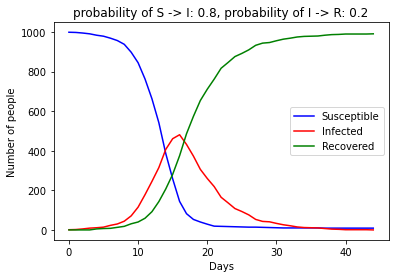

Maximum number of infected:  481


In [14]:
plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.title("probability of S -> I: {}, probability of I -> R: {}".format(prob_S_I, prob_I_R))
plt.legend()
plt.show()

print("Maximum number of infected: ", max(n_I))

From this plot, we see that the maximum number of infected is {{np.max(n_I)}}, which is reached around day 17. It is also evident, that all (or almost all) individuals become infected at some point, as the dynamics end with almost 0 susceptible and around 1000 recovered. 